In [92]:
import numpy as np
import matplotlib.pylab as plt
from point_configuration import PointConfiguration

In [93]:
N = 10 # total number of points
n = 3 # number of points to localize
m = N-n # number of anchors
d = 3
p = PointConfiguration(N, d)
p.set_points('normal')
print('anchors: {}, uncertain: {}'.format(m, n))

noise = 0.1
edm_measured = create_noisy_edm(p.edm, noise)

anchors: 7, uncertain: 3


init edm error: 0.337273031903


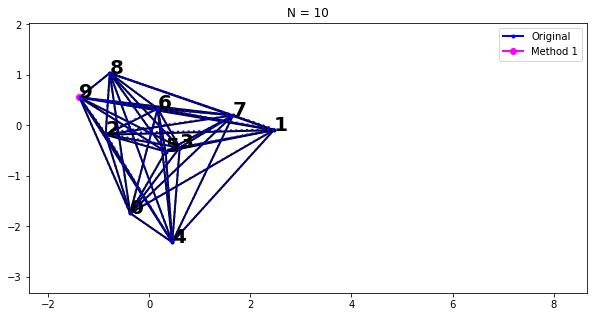

final cost: [ 0.03292129]
final edm error: 0.333065487951
rmse error: 0.01299920098


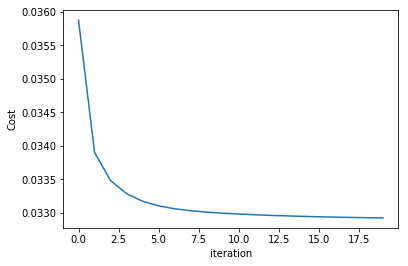

In [94]:
from basics import create_noisy_edm
from plots_cti import plot_point_sets, plot_matrix
from distributed_mds import reconstruct_dwmds

W = np.ones((N,N))
W[range(N), range(N)] = 0.0
r = 10 * np.zeros((n,1))
X_bar = p.points[:n]

X0 = p.points.copy()
max_iter = 20

print('init edm error:', np.linalg.norm(edm_measured**0.5 - get_edm(X0)**0.5))

X, costs = reconstruct_dwmds(edm_measured, X0, W, r=r, X_bar=X_bar, max_iter=max_iter)
plot_point_sets([p.points, X],display_lines=True)

print('final cost:', costs[-1])
print('final edm error:', np.linalg.norm(edm_measured**0.5 - get_edm(X)**0.5))
print('rmse error:',np.linalg.norm(X-p.points)/n)

plt.plot(costs)
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.show() 